In [66]:
%matplotlib inline

In [67]:
# os.system("pip install xgboost")

In [68]:
import pandas as pd
import os
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,Imputer,OneHotEncoder
from xgboost import XGBClassifier
import pandas_profiling as pp

<a href='#the_destination'>Link to the destination'</a>

In [22]:
# train=pd.read_csv('train.csv')

In [23]:
# train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
os.system('pip install pandas-profiling')

0

In [26]:
# import pandas_profiling as pp

In [27]:
# profile=pp.ProfileReport(train)

In [59]:
# /profile.get_rejected_variables(threshold=0.5)

In [28]:
# profile.to_file(outputfile="tmp/myoutputfile.html")

In [29]:
# train['Age'].describe()

In [30]:
# train = train.drop(['Cabin','Name','Ticket','Embarked'],axis=1)
# train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [12]:
# le=LabelEncoder()
# train['Sex']=le.fit_transform(train['Sex'])
# print(le.classes_)

NameError: name 'train' is not defined

In [66]:
# train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [67]:
# imp = Imputer(missing_values='NaN', strategy='median', axis=0)
# train['Age']=imp.fit_transform(np.array(train['Age']).reshape(-1, 1))

In [68]:
# train['Age'][:5]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [32]:
# train=train.fillna(train.median())

In [33]:
# train.describe()

In [34]:
# profile2=pp.ProfileReport(train)

In [35]:
# profile2.to_file(outputfile="tmp/profile2.html")
# train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [36]:
# df_without_embarked = train.to_csv("tmp/without_embarked.csv")

In [100]:
# # ohe= OneHotEncoder()
# le = LabelEncoder()

In [37]:
# p=le.fit(train["Embarked"])
# p.classes_

In [56]:
# X=train.drop(["Survived"],axis=1)
# y=train["Survived"]
# X.head(2)
# #y.head(2)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833


In [57]:
# model=RandomForestClassifier(n_jobs=-1,n_estimators=100)
# model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
# test=pd.read_csv('test.csv')
# test= test.drop(['Cabin','Name','Ticket','Embarked'],axis=1)

In [59]:
# profile_test=pp.ProfileReport(test)
# profile_test.to_file('tmp/test_report.html')

In [60]:
# test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [61]:
from sklearn.preprocessing import LabelEncoder,Imputer,OneHotEncoder
le=LabelEncoder()
test['Sex']=le.fit_transform(test['Sex'])

In [62]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [79]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [63]:

test=test.fillna(test.median())

In [114]:
y_pred = model.predict(test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [73]:
# submission1=pd.DataFrame({
#     "PassengerId":test["PassengerId"],
#     "Survived":y_pred})

In [76]:
# submission1.to_csv("tmp/sub1.csv",index=False)

In [77]:
# print(len(pd.read_csv("tmp/sub1.csv")))

418


## mixing both datasets

In [1]:
# train2=pd.concat([X,test])
# print(train2.shape)


NameError: name 'pd' is not defined

In [87]:
# train2.to_csv("tmp/train2.csv",index=False)

In [89]:
# combined2report=pp.ProfileReport(train2)
# combined2report.to_file("tmp/combinedreport.html")


In [118]:
# l=list(train["Survived"])
# print(len(l))
# l[:5]

# for i in y_pred:
#     l.append(i)
# print(len(l))


891
1309


In [121]:
# model2 = RandomForestClassifier(n_jobs=-1,n_estimators=100)
# model2.fit(train2,l)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
# y_pred2=model.predict(test)
# y_pred2.shape
# train2.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833


In [128]:
# submission2=pd.DataFrame({
#     "PassengerId":test["PassengerId"],
#     "Survived":y_pred2
# })


In [132]:
#print(submission1-submission2)

In [130]:
# submission2.to_csv("tmp/sub2.csv",index=False)

## attempt3 -- add columns familysize,Embarked[S,C,Q]

In [26]:
train3=pd.read_csv("train.csv")
test3=pd.read_csv("test.csv")

In [27]:
train3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train3=train3.drop(['Cabin','Name','Ticket'],axis=1)
test3=test3.drop(['Cabin','Name','Ticket'],axis=1)

train3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [37]:
test3["Age"]=test3["Age"].fillna(test3["Age"].median())
test3["Embarked"]=test3["Embarked"].fillna("S")
test3["Fare"]=test3["Fare"].fillna(test3["Fare"].mean())

test3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [34]:
train3["Age"]=train3["Age"].fillna(test3["Age"].median())
train3["Embarked"]=train3["Embarked"].fillna("S")

train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [8]:
# train3["Age"]=train3["Age"].fillna(train3["Age"].median())

In [9]:
# train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [46]:
le = LabelEncoder()
train3['Sex']=le.fit_transform(train3['Sex'])
test3['Sex']=le.fit_transform(test3['Sex'])
test3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,892,3,1,34.5,0,0,7.8292,2,1
1,893,3,0,47.0,1,0,7.0000,0,2
2,894,2,1,62.0,0,0,9.6875,2,1
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,3


In [11]:
train3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [12]:
#train3=train3.fillna(train3.median(axis=1))

In [13]:
#test3=test3.fillna(test3.median(axis=1))


In [14]:
test3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S


In [40]:
embarked_map={"S":0,"C":1,"Q":2}
train3["Embarked"]=train3["Embarked"].map(embarked_map)
test3["Embarked"]=test3["Embarked"].map(embarked_map)


In [41]:
# test3["Embarked"][:5]
test3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,2
1,893,3,female,47.0,1,0,7.0000,0
2,894,2,male,62.0,0,0,9.6875,2
3,895,3,male,27.0,0,0,8.6625,0
4,896,3,female,22.0,1,1,12.2875,0


In [45]:
train3["Family_size"]=train3["SibSp"]+train3["Parch"]+1
test3["Family_size"]=test3["SibSp"]+test3["Parch"]+1
train3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,0,3,male,22.0,1,0,7.2500,0,2
1,2,1,1,female,38.0,1,0,71.2833,1,2
2,3,1,3,female,26.0,0,0,7.9250,0,1
3,4,1,1,female,35.0,1,0,53.1000,0,2
4,5,0,3,male,35.0,0,0,8.0500,0,1


### ADABOOST,XGBOOST

In [47]:
xgb_model=XGBClassifier()
xgb_model.fit(train3.drop(["Survived"],axis=1),train3["Survived"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [48]:
y_pred3=xgb_model.predict(test3)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
submission3=pd.DataFrame({
    "PassengerId":test3["PassengerId"],
    "Survived":y_pred3
})


In [50]:
submission3.to_csv("tmp/sub3.csv",index=False)
print(len(submission3))

418


#### add familysize

In [54]:
rf3=RandomForestClassifier(n_estimators=100,n_jobs=-1)
rf3.fit(train3.drop(["Survived"],axis=1),train3["Survived"])
y_pred4=rf3.predict(test3)

In [56]:
sub4=pd.DataFrame({
    "PassengerId":test3["PassengerId"],
    "Survived":y_pred4
})

In [58]:
sub4.to_csv("tmp/sub4.csv",index=False)

In [60]:
train4=train3.to_csv("tmp/train4.csv",index=False)
test4=test3.to_csv("tmp/test4.csv",index=False)

# Attempt 4


<a id='the_destination'></a>

In [69]:
train4 = pd.read_csv("tmp/train4.csv")
test4=pd.read_csv("tmp/test4.csv")

### evaluate age

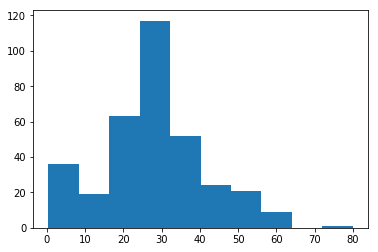

In [76]:
plt.hist(train4["Age"][train4["Survived"]==1],bins=10)
plt.show()

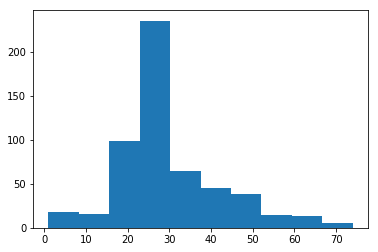

In [74]:
plt.hist(train4["Age"][train4["Survived"]==0],bins=10)
plt.show()

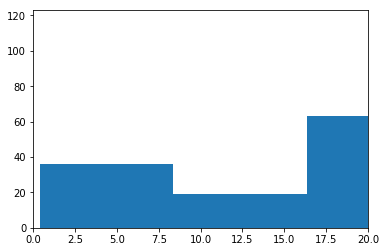

In [78]:
plt.hist(train4["Age"][train4["Survived"]==1],bins=10)
plt.xlim(0,20)
plt.show()

# create new column -- age_normalized and fare_normalized, title(from name)

### age normalized

### fare_normalized

### title